In [ ]:
# 1.8.2 配置matplotlib参数
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
plt.rcParams['lines.color'] = 'r'
plt.plot(t,s)

c = np.cos(2 * np.pi * t)
plt.rcParams['lines.color'] = 'b'
plt.rcParams['lines.linewidth'] = '14'
plt.plot(t,c)

plt.show()

In [ ]:
# 2.2.2 从csv导入数据
import csv

filename = 'data.csv'
data = []

try:
    with open(filename) as f:
        reader = csv.reader(f)
        c = 0
        for row in reader:
            if c == 0:
                header = row
            else:
                data.append(row)
            c += 1
            
except csv.Error as e:
    print("Error reading CSV file at line %s: %s" % (reader.line_num, e))
    sys.exit(-1)

if header:
    print(header) 
    print('==================')

for datarow in data:
    print(datarow)

In [ ]:
# 2.3.2 从EXCLE导入数据
import xlrd
from pprint import pprint

file = 'ch02-xlsxdata.xlsx'
wb = xlrd.open_workbook(filename=file)
sheet_names = wb.sheet_names()
ws = wb.sheet_by_name(sheet_names[0])

dataset = []
for r in range(ws.nrows):
    for j in range(ws.ncols):
        dataset.append(ws.cell(r,j).value)

pprint(dataset)

In [ ]:
#2.3.3 从EXCEL导入时间数据
from datetime import datetime
from xlrd import open_workbook,xldate_as_tuple
import xlrd

file = 'ch02-xlsxdata.xlsx'
wb = xlrd.open_workbook(filename=file)
sheet_names = wb.sheet_names()
ws = wb.sheet_by_name(sheet_names[0])

cell = ws.cell(1,0)
print(cell)
print(cell.value)
print(cell.ctype)
if cell.ctype == xlrd.XL_CELL_DATE:
    data_value = xldate_as_tuple(cell.value,wb.datemode)
    print(datetime(*data_value))
    

In [ ]:
# 2.4.2 准备定宽数据
import string
import random

ROWS = 1000000
SAMPLE = '012345678901234567890123456'
F1 = 9
F2 = F1 + 13
F3 = F2 + 4

f = open("collegeAll.data",'w',encoding='utf-8')
for r in range(ROWS):
    t = ''.join(random.sample(SAMPLE,len(SAMPLE)))
    f.write(t[0:F1] + " " + t[F1:F2] + " " + t[F2:F3] + '\n')
    print(t[0:F1], t[F1:F2], t[F2:F3])

f.close()

In [ ]:
# 2.4.2 读取定宽数据
import struct
import string

datafile = "collegeAll.data"
mask = '9s14s5s'

f = open(datafile, 'r')
for line in f:
    fields = struct.Struct(mask).unpack_from(bytes(line,'utf-8'))
    print("fields: ", [field.strip() for field in fields])

In [ ]:
# 2.5.2 从制表符文件中读取数据
import csv

filename = 'data.tab'
data = []

try:
    with open(filename) as f:
        reader = csv.reader(f, dialect = csv.excel_tab)
        c = 0
        for row in reader:
            if c == 0:
                header = row
            else:
                data.append(row)
            c += 1
            
except csv.Error as e:
    print("Error reading CSV file at line %s: %s" % (reader.line_num, e))
    sys.exit(-1)

if header:
    print(header) 
    print('==================')

for datarow in data:
    print(datarow)

In [ ]:
import requests
from pprint import pprint

url = 'https://api.github.com/events'
r = requests.get(url)
json_obj = r.json()

repos = set() # we want just unique urls
for entry in json_obj:
    try:
        repos.add(entry['repo']['url'])
    except KeyError as e:
        print("No key %s. Skipping..." % (e))
 
pprint(repos)

In [ ]:
import os
import sys
import argparse
try:
    import StringIO as StringIO
except:
    import io as StringIO
import struct
import json
import csv
from xlwt import Workbook

def import_data(import_file):
    mask = '9s14s5s'
    data = []
    with open(import_file, 'r') as f:
        for line in f:
            fields = struct.Struct(mask).unpack_from(bytes(line,'utf-8'))
            data.append(list(field.strip() for field in feilds))
    return data
        
def write_data(data, export_format):
    if export_format == 'csv':
        return write_csv(data)
    elif export_format == 'json':
        return write_json(data)
    elif export_format == 'xlsx':
        return write_xlsx(data)
    else:
        raise Exception("Illegal format defined")

def write_csv(data):
    f = StringIO.StringIO()
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)
    return f.getvalue()

def write_json(data):
    j = json.dumps(data)
    return j

def write_xlsx(data):
    workbook = Workbook()
    sheet = workbook.add_sheet('sheet1')
    row = 0
    for line in data:
        col = 0
        for datum in line:
            print(datum)
            sheet.write(row, col, datum)
            col += 1
        row += 1
        if(row > 65535):
            print("hit limit of # of rows in one sheet (65535)")
            break
    f = StringIO.StringIO()
    Workbook.save(f)
    return f.getvalue()

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("import_file", help='path to a fixed-width data file.')
    parser.add_argument("export_format", help='Export format: csv, json, xlsx.')
    args = parser.parse_args()

    if args.import_file is None:
        print("You myst specify path to import from.", file = sys.stderr)
        sys.exit(1)
    if args.export_format not in ('csv','json','xlsx'):
        print("You must provide valid export file format.", file = sys.stderr)
        sys.exit(1)
    if not os.path.isfile(args.import_file):
        print("Given path is not a file: %s" %(args.import_file), file = sys.stderr)
        sys.exit(1)

    data = import_data(args.import_file)
    print(write_data(data, args.export_format))
        


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points, threshold = 3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    
    median = np.median(points, axis=0)
    diff = np.sum((points-median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > threshold

x = np.random.random(100)
buckets = 50
x = np.r_[x, -49, 95, 100, -100]
filtered = x[~is_outlier(x)]

plt.figure()
plt.subplot(211)
plt.hist(x, buckets)
plt.xlabel("Raw")

plt.subplot(212)
plt.hist(filtered, buckets)
plt.xlabel("Cleaned")

plt.show()

In [ ]:
from pylab import *

spread = rand(50)*100
center = ones(25)*50
flier_high = rand(10)*100 + 100
flier_low = rand(10)* -100
data = concatenate( (spread, center, flier_high, flier_low),0)

subplot(311)
boxplot(data, 0 ,'gx')

subplot(312)
spread_1 = concatenate( (spread, flier_high, flier_low), 0)
center_1 = ones(70)*25
scatter(center_1, spread_1)
xlim([0,50])

subplot(313)
center_2 = rand(70)*50
scatter(center_2,spread_1)
xlim([0,50])

show()

In [ ]:
from pylab import *

x = 1e6*rand(1000)
y = rand(1000)

subplot(211)
scatter(x,y)
xlim(1e-6,1e6)

subplot(212)
scatter(x,y)
xscale('log')
xlim(1e-6, 1e6)

In [ ]:
import time
import os
import sys

if len(sys.argv) != 2:
    print(sys.stderr)
    print( "Please specify filename to read")

filename = 'ch02-xlsxdata.xlsx'
if not os.path.isfile(filename):
    print(sys.stderr) 
    print("Given file: \"%s\" is not a file" % filename)

with open(filename,'r') as file:
    filesize = os.stat(filename)[6]
    file.seek(filesize)

    while True:
        where = file.tell()
        line = file.readline()
        if not line:
            time.sleep(1)
            file.seek(where)
        else:
            print(line)

In [ ]:
import scipy.misc
import matplotlib.pyplot as plt

lena = scipy.misc.ascent()
plt.gray()
plt.imshow(lena)
plt.colorbar()
plt.show()

print(lena.shape)
print(lena.max())
print(lena.dtype)

In [ ]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt

bug = Image.open('stinKbug.png')
arr = numpy.array(bug.getdata(), numpy.uint8).reshape(bug.size[1], bug.size[0], 3)

plt.gray()
plt.imshow(arr)
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy
import scipy.misc

bug = numpy.array(plt.imread('stinkbug.png'))
print(bug.shape)
bug = bug[:,:,0]
plt.figure()
plt.gray()
plt.subplot(121)
plt.imshow(bug)

zbug = bug[100:350,140:350]
plt.subplot(122)
plt.imshow(zbug)
plt.show()

In [ ]:
import pylab
import random

SAMPLE_SIZE = 100000
random.seed()
real_rand_vars = []
real_rand_vars = [random.random() for val in range(SAMPLE_SIZE)]
pylab.hist(real_rand_vars,10)

pylab.xlabel("Number range")
pylab.ylabel("Count")

pylab.show()

In [ ]:
import pylab
import random

duration = 100
mean_inc = 0.2
std_dev_inc = 1.2
x = range(duration)
y = []
price_today = 0
for i in x:
    next_delta = random.normalvariate(mean_inc, std_dev_inc)
    price_today += next_delta
    y.append(price_today)

pylab.plot(x,y)
pylab.xlabel("Time")
pylab.ylabel("Value")
pylab.show()

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt

SAMPLE_SIZE = 1000
buckets = 100

plt.figure()
matplotlib.rcParams.update({'font.size':7})

plt.subplot(621)
plt.xlabel("ranodm.random")
res = [random.random() for _ in range(1,SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(622)
plt.xlabel("random.uniform")
res = [random.uniform(1,SAMPLE_SIZE) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(623)
plt.xlabel("random.trangular")
res = [random.triangular(1,SAMPLE_SIZE) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(624)
plt.xlabel("random.betaveriate")
res = [random.betavariate(1,10) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(625)
plt.xlabel("random.expovariate")
lambd = 1.0/((SAMPLE_SIZE + 1)/ 2.0)
res = [random.expovariate(lambd) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(626)
plt.xlabel("random.gammavariate")
res = [random.gammavariate(1,10) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(627)
plt.xlabel("random.lognormvariate")
res = [random.lognormvariate(1,0.5) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(628)
plt.xlabel("random.normalvariate")
res = [random.normalvariate(1,0.5) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(629)
plt.xlabel("random.paretovariate")
res = [random.paretovariate(1) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.tight_layout()
plt.show()

In [ ]:
from pylab import *
from numpy import *

def moving_average(interval, window_size):
    window = ones(int(window_size))/ float(window_size)
    return convolve(interval, window, 'same')

t = linspace(-4, 4, 100)
y = sin(t) + randn(len(t)) * 0.1
plot(t, y, 'k.')

y_av = moving_average(y, 10)
plot(t, y_av, 'r')
xlabel("Time")
ylabel("Value")
grid(True)
show()

In [ ]:
import numpy
from numpy import *
from pylab import *

WINDOWS = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
def smooth(x, window_len = 11, window = 'hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension array")
    if x.size < window_len:
        raise ValueError("input vector needs to bigger than window size")

    if window_len < 3:
        return x

    if not window in WINDOWS:
        raise ValueError("window is one of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman' " )

    s = numpy.r_[x[window_len-1 : 0: -1], x, x[-1:-window_len: -1]]
    if window == 'flat':
        w = numpy.ones(window_len, 'd')
    else:
        w = eval('numpy.' + window + '(window_len)')

    y = numpy.convolve(w/w.sum(), s, mode = 'valid')
    return y

t = linspace(-4, 4, 100)
x = sin(t)
xn = x + randn(len(t))*0.1
y = smooth(x)
ws = 31
subplot(211)
plot(ones(ws))

for w in WINDOWS[1:]:
    eval('plot(' + w + '(ws) )')
axis([0, 30, 0, 1.1])
legend(WINDOWS)
title("Smoothing window")

subplot(212)
plot(x)
plot(xn)
for w in WINDOWS:
    plot(smooth(xn, 10, w))
    
l = ['original signal', 'signal with noise']
l.extend(WINDOWS)
legend(l)
title("Smooth signal")

show()

In [ ]:
import numpy as np
import pylab as p
import scipy.signal as signal

x = np.linspace(0, 1, 100)
x[3::10] = 1.5
p.plot(x)
p.plot(signal.medfilt(x,3))
p.plot(signal.medfilt(x,5))
p.legend(['original signal', 'length 3', 'length 5'])
p.show()


In [ ]:
import matplotlib.pyplot as plt

plot([1,2,3,2,3,2,2,1])
plot([4,3,2,1],[1,2,3,4])

In [ ]:
from matplotlib.pyplot import *

x = [1,2,3,4]
y = [5,4,3,2]

figure()
subplot(231)
plot(x,y)
subplot(232)
bar(x,y)
subplot(233)
barh(x,y)
subplot(234)
bar(x,y)

y1 = [7,8,3,5]
bar(x, y1, bottom = y, color = 'r')
subplot(235)
boxplot(x)
subplot(236)
scatter(x,y)

show()

In [ ]:
from pylab import *

dataset = [113, 115, 119, 121, 124,
           124, 125, 126, 126, 126,
           127, 127, 125, 129, 130,
           130, 131, 132, 133, 136]
subplot(121)
boxplot(dataset, vert = False)
subplot(122)
hist(dataset)
show()

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint = True)
y = np.cos(x)
y1 = np.sin(x)

pl.plot(x, y)
pl.plot(x, y1)
pl.show()

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint = True)
y = np.cos(x)
y1 = np.sin(x)

title("Functions $\sin$ and $\cos$")
xlim(-3.0, 3.0)
ylim(-1.0, 1.0)
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
        [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$-\pi/2$', r'$-\pi$'])
yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$'])

pl.plot(x, y)
pl.plot(x, y1)
pl.show()

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

axis()
l = [-1, 1, -10, 10]
axis(l)

axhline()
axvline()
axhline(4)

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

plot(x, y, linewidth = 1.5)
line, = plot(x, y)
line.set_linewidth(1.5)
lines = plot(x, y)
setp(lines, 'linewidth', 1.5)
setp(lines, linewidth = 1.5)

In [ ]:
from pylab import *

ax = gca()
ax.locator_params(tight = True, nbins = 10)
ax.plot(np.random.normal(10, .1, 100))

show()

In [ ]:
from pylab import *
import matplotlib as mpl
import datetime

start = datetime.datetime(2013, 1, 1)
stop = datetime.datetime(2013, 12, 31)
delta = datetime.timedelta(days = 1)

dates = mpl.dates.drange(start, stop, delta)
values = np.random.rand(len(dates))

fig = figure()
ax = gca()
ax.plot_date(dates, values, linestyle = '-', marker = ' ')
date_format = mpl.dates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

show()

In [ ]:
# 3.7.2 图例和注释
from matplotlib.pyplot import *

x1 = np.random.normal(30, 3, 100)
x2 = np.random.normal(20, 3, 100)
x3 = np.random.normal(10, 3, 100)

plot(x1, label = '1plot')
plot(x2, label = '2plot')
plot(x3, label = '3plot')

legend(bbox_to_anchor = (0.0, 1.02, 1.0, 0.102), loc = 3, 
        ncol = 3, mode = "expand", borderaxespad = 0.0)
annotate("Important value", (55, 20), xycoords = 'data',
        xytext = (5, 38), arrowprops = dict(arrowstyle = '->'))

show()

In [ ]:
# 3.8.2 移动轴线到图中央
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 5000, endpoint = True)
y = np.sin(x)
plt.plot(x, y)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

In [ ]:
# 3.9.2 直方图
import numpy as np
import matplotlib.pyplot as plt

mu = 100
sigma = 15
x = np.random.normal(mu, sigma, 100000)
ax = plt.gca()
ax.hist(x, bins = 35, color = 'r')
ax.set_xlabel('Values')
ax.set_ylabel("Frequency")
ax.set_title(r'$\mathrm{Histogram:}\ \mu=%d,\ \sigma=%d$' % (mu, sigma))

plt.show()

In [ ]:
# 3.10.2 误差条形图
import numpy as np

x = range(0, 10, 1)
y = np.log(x)
xe = 0.1*np.abs(np.random.randn(len(y)))

plt.bar(x, y, yerr=xe, width=0.4, align='center',ecolor='r'
        ,color='cyan',label='experiment #1')
plt.xlabel('# measurement')
plt.ylabel('measured values')
plt.title('measurements')
plt.legend(loc='upper left')

plt.show()

In [ ]:
# 3.11.2 绘制饼图
from pylab import *

figure(1, figsize=(6, 6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels = 'Spring', 'Summer', 'Autunm', 'Winter'
x = [10, 30, 45, 10]
explode = [0.1, 0.1, 0.1, 0.1]

title("Rainy days by season")

pie(x, explode=explode, labels=labels,
    autopct='%1.1f%%', startangle=67)

show()

In [ ]:
# 3.12.2 填充区域
from matplotlib.pyplot import figure,show,gca
import numpy as np

x = np.arange(0.0, 2.0, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig = figure()
ax = gca()

ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=(y2>=y1), 
        facecolor='darkblue', interpolate=True)
ax.fill_between(x, y1, y2, where=(y2<=y1), 
        facecolor='deeppink', interpolate=True)

ax.set_title('filled between')

show()

In [ ]:
# 3.13.2 彩色标记散点图
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(1000)
y1 = np.random.randn(len(x))
y2 = 1.2 + np.exp(x)

ax1 = plt.subplot(121)
plt.scatter(x, y1, color='indigo', alpha=0.3,
        edgecolor='white', label='no correl')
plt.xlabel('no correlation')
plt.grid(True)
plt.legend()

ax2 = plt.subplot(122, sharey=ax1, sharex=ax1)
plt.scatter(x, y2, color='green', alpha=0.3,
        edgecolor='grey', label='correl')
plt.xlabel('strong correlation')
plt.grid(True)
plt.legend()

show()

In [ ]:
# 4.2.2 设置坐标轴标签
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np

data = np.random.randn(70)

fontsize = 18
title = 'this is a figure title'
x_label = 'this is a x axis label'
y_label = 'this is a y axis label'
title_txt_obj = plt.title(title, fontsize=fontsize, verticalalignment='bottom')
title_txt_obj.set_path_effects([patheffects.withSimplePatchShadow()])
offset_xy = (-1, 1)
rgbRed = (1.0, 0.0, 0.0)
alpha = 0.8
pe = patheffects.withSimplePatchShadow(offset_xy,
                                       rgbRed,
                                       alpha)
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.plot(data)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

def setup(layout=None):
    assert layout is not None

    fig = plt.figure()
    ax = fig.add_subplot(layout)
    return fig, ax

def get_signal():
    t = np.arange(0.0, 2.5, 0.01)
    s = np.sin(5*np.pi*t)
    return t, s

def plot_signal(t, s):
    line, = axes.plot(t, s, linewidth=5, color='magenta')
    return line

def make_shadow(fig, axes, line, t, s):
    delta = 2/72.0
    offset = transforms.ScaledTranslation(delta, -delta, fig.dpi_scale_trans)
    offset_transfrom = axes.transData + offset
    axes.plot(t, s, linewidth=5, color='gray',
              transform=offset_transfrom,
              zorder=0.5*line.get_zorder())

if __name__ == "__main__":
    fig, axes = setup(111)
    t, s = get_signal()
    line = plot_signal(t, s)

    make_shadow(fig, axes, line, t, s)
    axes.set_title('Shadow effect using an offset transform')
    plt.show()

In [ ]:
import matplotlib.pylab as plt
import numpy as np

plt.figure()
ax = plt.gca()
y = np.random.randn(9)

col_labels = ['col1', 'col2', 'col3']
row_labels = ['row1', 'row2', 'row3']
table_vals = [[11, 12, 13], [21, 22, 23], [28, 29, 30]]
row_colors = ['red', 'gold', 'green']

my_table = plt.table(cellText=table_vals,
                     colWidths=[0.1]*3,
                     rowLabels=row_labels,
                     colLabels=col_labels,
                     rowColours=row_colors,
                     loc='upper right')

plt.plot(y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0)
axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
axes3 = plt.subplot2grid((3, 3), (1, 2))
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=2)

all_axes = plt.gcf().axes
for ax in all_axes:
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(10)

plt.suptitle("Demo of subplot2grid")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(0)
axes = fig.add_subplot(111)
rectangle = axes.patch
rectangle.set_facecolor('blue')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
axes = fig.add_subplot(111)
rect = matplotlib.patches.Rectangle((1, 1), width=6, height=12)
axes.add_patch(rect)
axes.figure.canvas.draw()

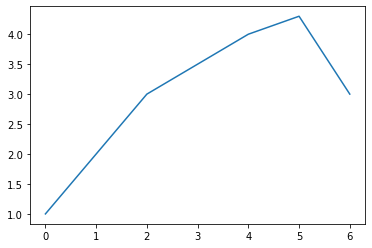

In [11]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 3.5, 4, 4.3, 3])
plt.grid()
plt.grid()

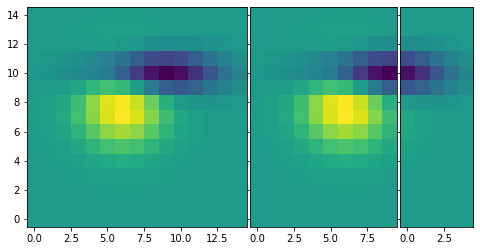

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.cbook import get_sample_data

def get_demo_image():
    f = get_sample_data('axes_grid/bivariate_normal.npy')
    Z = np.load(f)
    return Z, (-3, 4, -4, 3)

def get_grid(fig=None, layout=None, nrows_ncols=None):
    assert fig is not None
    assert layout is not None
    assert nrows_ncols is not None

    grid = ImageGrid(fig, layout, nrows_ncols=nrows_ncols, 
                     axes_pad=0.05, add_all=True, label_mode='L')
    return grid

def load_images_to_grid(grid, Z, *images):
    min, max = Z.min(), Z.max()
    for i, image in enumerate(images):
        axes = grid[i]
        axes.imshow(image, origin='lower', vmin=min,
                    vmax=max, interpolation='nearest')

if __name__ == "__main__":
    fig = plt.figure(1, (8, 6))
    grid = get_grid(fig, 111, (1, 3))
    Z, extent = get_demo_image()

    image1 = Z
    image2 = Z[:, :10]
    image3 = Z[:, 10:]

    load_images_to_grid(grid, Z, image1, image2, image3)
    plt.draw()
    plt.show()

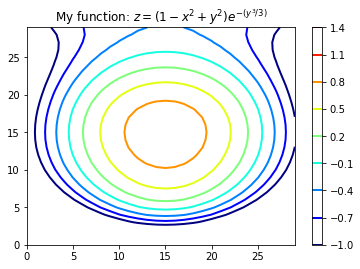

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def process_signals(x, y):
    return (1 - (x**2 + y**2))*np.exp(-y**3/3)

x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)
X, Y = np.meshgrid(x, y)
Z = process_signals(X, Y)
N = np.arange(-1, 1.5, 0.3)
CS = plt.contour(Z, N, linewidths=2, cmap=mpl.cm.jet)
plt.colorbar(CS)

plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3/3)}$')
plt.show()

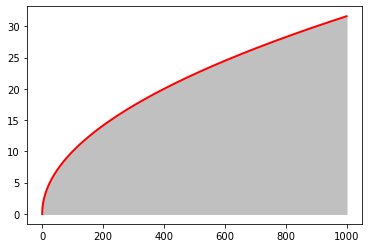

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt

t = range(1000)
y = [sqrt(i) for i in t]
plt.plot(t, y, color='red', lw=2)
plt.fill_between(t, y, color='silver')
plt.show()

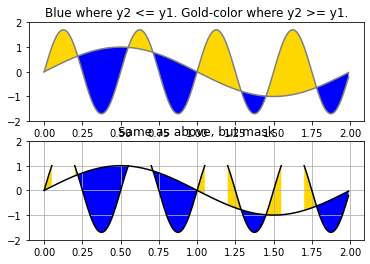

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi*x)
y2 = 1.7*np.sin(4*np.pi*x)

fig = plt.figure()
axes1 = fig.add_subplot(211)
axes1.plot(x, y1, x, y2, color='grey')
axes1.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes1.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes1.set_title('Blue where y2 <= y1. Gold-color where y2 >= y1.')
axes1.set_ylim(-2,2)

y2 = np.ma.masked_greater(y2, 1.0)
axes2 = fig.add_subplot(212, sharex=axes1)
axes2.plot(x, y1, x, y2, color='black')
axes2.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes2.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes2.set_title('Same as above, but mask')
axes2.set_ylim(-2,2)
axes2.grid('on')

plt.show()

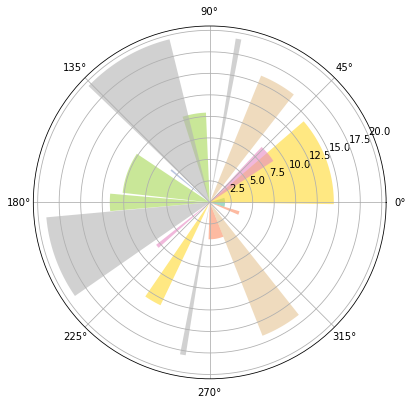

In [16]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

figsize = 7
colormap = lambda r: cm.Set2(r / 20.)
N = 18

fig = plt.figure(figsize=(figsize,figsize))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7], polar=True)

theta = np.arange(0.0, 2 * np.pi, 2 * np.pi/N)
radii = 20 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(colormap(r))
    bar.set_alpha(0.6)

plt.show()

In [20]:
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


def build_folders(start_path):
    folders = []

    for each in get_directories(start_path):
        size = get_size(each)
        if size >= 25 * 1024 * 1024:
            folders.append({'size': size, 'path': each})

    for each in folders:
        print("Path: " + os.path.basename(each['path']))
        print("Size: " + str(each['size'] / 1024 / 1024) + " MB")

    return folders


def get_size(path):
    assert path is not None

    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            try:
                size = os.path.getsize(fp)
                total_size += size
            except OSError as err:
                print(str(err))
                pass
    return total_size


def get_directories(path):
    dirs = set()
    for dirpath, dirnames, filenames in os.walk(path):
        dirs = set([os.path.join(dirpath, x) for x in dirnames])
        break  
    return dirs


def draw(folders):
    figsize = (8, 8)  
    ldo, rup = 0.1, 0.8  
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([ldo, ldo, rup, rup], polar=True)

    x = [os.path.basename(x['path']) for x in folders]
    y = [y['size'] / 1024 / 1024 for y in folders]
    theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / len(x))
    radii = y

    bars = ax.bar(theta, radii)
    middle = 90 / len(x)
    theta_ticks = [t * (180 / np.pi) + middle for t in theta]
    lines, labels = plt.thetagrids(theta_ticks, labels=x, frac=0.5)
    for step, each in enumerate(labels):
        each.set_rotation(theta[step] * (180 / np.pi) + middle)
        each.set_fontsize(8)

    colormap = lambda r: cm.Set2(r / len(x))
    for r, each in zip(radii, bars):
        each.set_facecolor(colormap(r))
        each.set_alpha(0.5)

    plt.show()

if __name__ == '__main__':
    if len(sys.argv) is not 2:
        print("ERROR: Please supply path to folder.")
        sys.exit(-1)

    start_path = sys.argv[1]

    if not os.path.exists(start_path):
        print("ERROR: Path must exits.")
        sys.exit(-1)

    folders = build_folders(start_path)

    if len(folders) < 1:
        print("ERROR: Path does not contain any folders.") 
        sys.exit(-1)

    draw(folders)

ERROR: Please supply path to folder.


SystemExit: -1

In [ ]:
from matplotlib  import pyplot as  plt 

x = range(2,26,2)
y = [15,13,14.5,17,20,25,26,26,24,22,18,15]

plt.figure(figsize=(20,8),dpi=80)
plt.rc("lines", linewidth=2, color='g')
plt.plot(x, y)
plt.xticks(range(2,25))

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5,4.5], ylim=[-2, 8], title = 'An Example Axes', ylabel = 'Y-Aixs', xlabel = 'X-Aixs')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

plt.show()

In [ ]:
from openpyxl import load_workbook
from pprint import pprint

file = 'ch02-xlsxdata.xlsx'
wb = load_workbook(filename=file)
ws = wb.get_sheet_by_name('2014-2019一分一段表')

dataset = []
for r in ws.rows:
    col = []
    for c in r:
        col.append(c.value)
    dataset.append(col)

pprint(dataset)

In [ ]:
# 5.2.2 3D柱状图
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for z in [2011, 2012, 2013, 2014]:
    xs = range(1,13)
    ys = 1000 * np.random.rand(12)
    
    color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

V = [0, -5, -10, -15, -30, -40, -50, -60, -100]
SIZE = len(V)
U = np.zeros(SIZE)
y = np.ones(SIZE) 
x = [0, 5, 10, 15, 30, 40, 50, 60, 100]

plt.barbs(x, y, U, V, length=9)
plt.xticks(x)
plt.ylim(0.98, 1.05)

plt.show()

In [ ]:
# 7.5.2 流线图
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

Y, X = np.mgrid[0:5:100j, 0:5:100j]
U = X
# U = np.sin(X)
V = Y

print("X")
pprint(X)
print("Y")
pprint(Y)

plt.streamplot(X, Y, U, V)

plt.show()